# Advance Data Visualization

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv("D:\DataScience\DS_DATA_SETS\DS_DATA_SETS\ML\laptop_price.csv", encoding='latin1')

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\malip\AppData\Local\Temp\ipykernel_28084\1982769022.py:1: SyntaxWarning: invalid escape sequence '\D'
  data = pd.read_csv("D:\DataScience\DS_DATA_SETS\DS_DATA_SETS\ML\laptop_price.csv", encoding='latin1')


# Data Overview and Preprocessing

### What are the first few rows of the dataset?

In [8]:
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


### How many rows and columns does the dataset have?

In [9]:
data.shape

(1303, 13)

### Are there any missing values in the dataset? If so, which columns contain them and how many?

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


### What are the data types of each column? Are there any columns that need their data types changed?

In [11]:
data.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

### Are there any duplicate rows in the dataset? If so, how many and which rows are they?


In [12]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1298    False
1299    False
1300    False
1301    False
1302    False
Length: 1303, dtype: bool

### How can we handle missing values in the dataset? What imputation methods can be used?

In [13]:
data.isnull()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,False,False,False,False,False,False,False,False,False,False,False,False,False
1299,False,False,False,False,False,False,False,False,False,False,False,False,False
1300,False,False,False,False,False,False,False,False,False,False,False,False,False
1301,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
data.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

# Statistical Summary

### What is the statistical summary of the numerical columns (mean, median, standard deviation, etc.)?

In [15]:
data.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


### What is the distribution of the categorical columns?

In [16]:
data_cat=data.select_dtypes(include=['object'])
data_cat

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg
1,Apple,Macbook Air,Ultrabook,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg
2,HP,250 G6,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg
3,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg
4,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg
...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg


In [17]:
data_cat["Company"].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [18]:
comp_counts=data["Company"].value_counts()
comp_counts

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

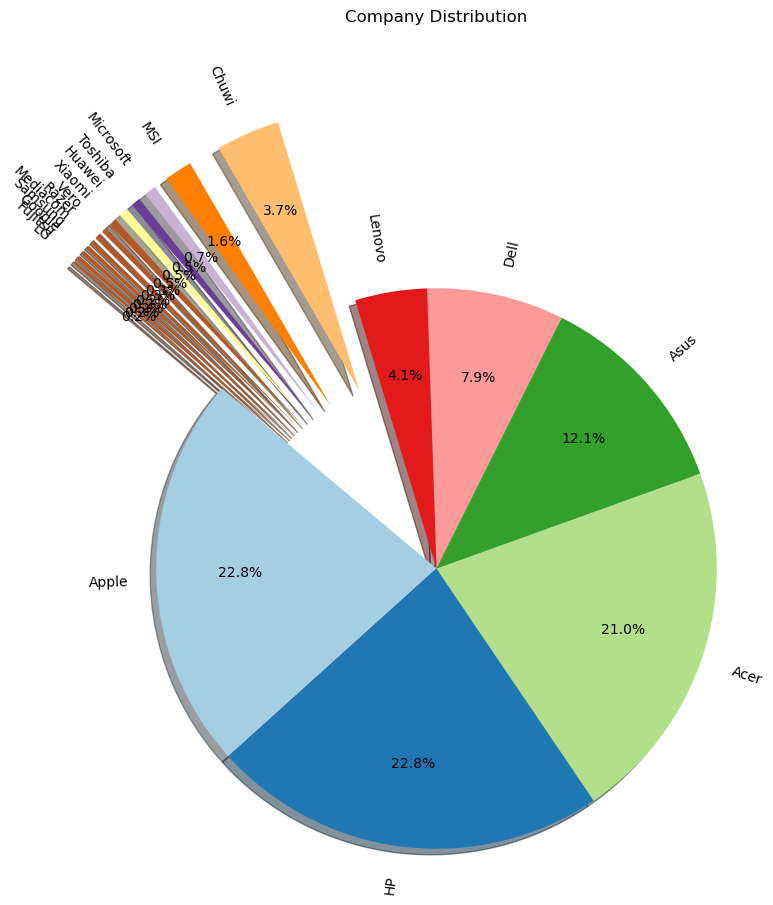

In [103]:
explode = [0.9 if value < 50 else 0 for value in data["Company"].value_counts()]

# Colors for the pie chart
colors = plt.cm.Paired(range(len(data["Company"].unique())))

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(data["Company"].value_counts(),labels=data["Company"].unique(),colors=colors,autopct='%1.1f%%',explode=explode,shadow=True,startangle=140,rotatelabels=True,pctdistance=0.7,radius=1.3)
plt.title('Company Distribution',y=1.5)
plt.show()

##### count plot using seaborn

Text(0.5, 1.0, 'Company Distribution')

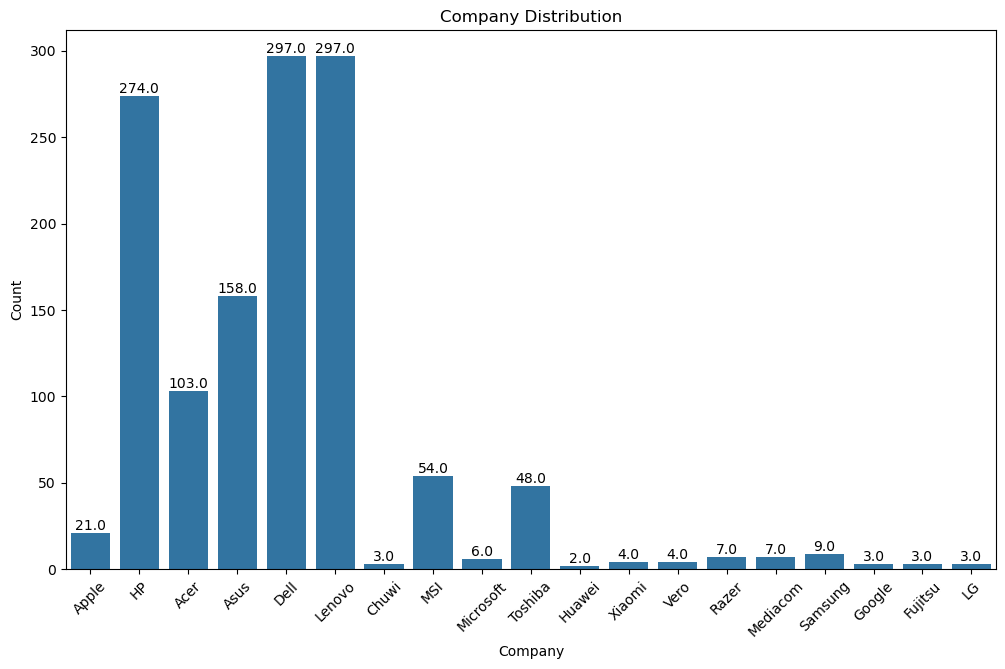

In [19]:
plt.figure(figsize=(12,7))
sns.countplot(x="Company",data=data)
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x() + p.get_width() / 2.,p.get_height()),ha='center',va='bottom',fontsize=10)
plt.xlabel("Company")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.title("Company Distribution")
#bottom', 'baseline', 'center', 'center_baseline', 'top'

#### similar but using line plot 

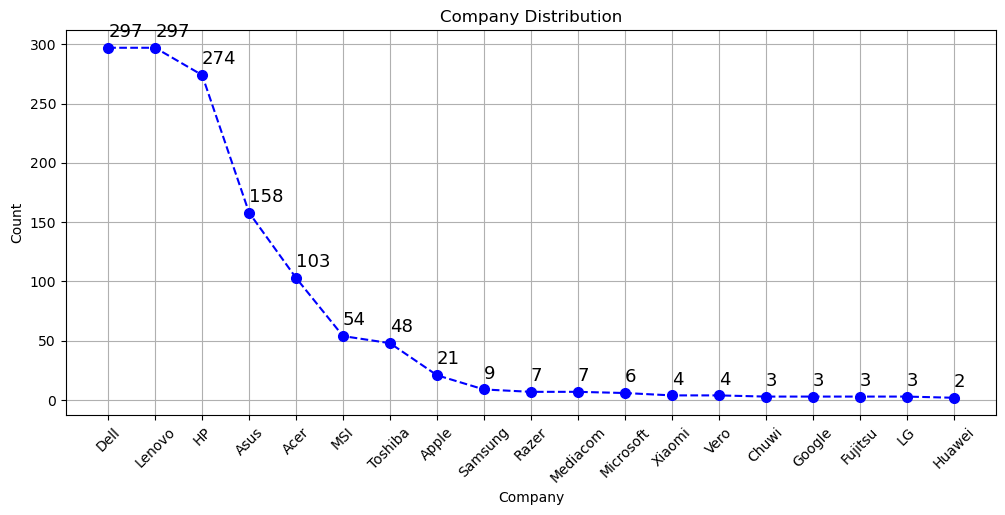

In [20]:
plt.figure(figsize=(12,5))
plt.plot(comp_counts.index,comp_counts.values,marker='o',markersize=7,linestyle="--",color='b')
plt.xlabel("Company")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.title("Company Distribution")
plt.grid()
#to display values on the point
for x, y in zip(comp_counts.index,comp_counts.values):
    plt.annotate(f'{y}',(x,y),ha="left",textcoords="offset points", xytext=(0, 5),va="bottom",fontsize=13)

### Are there any outliers in the numerical columns? How can they be detected and visualized?

In [21]:
data_num=data.select_dtypes(exclude=['object'])
data_num

,laptop_ID,Inches,Price_euros
0,1,13.3,1339.69
1,2,13.3,898.94
2,3,15.6,575.00
3,4,15.4,2537.45
4,5,13.3,1803.60
...,...,...,...
1298,1316,14.0,638.00
1299,1317,13.3,1499.00
1300,1318,14.0,229.00
1301,1319,15.6,764.00


In [22]:
data_num.iloc[:,:]

,laptop_ID,Inches,Price_euros
0,1,13.3,1339.69
1,2,13.3,898.94
2,3,15.6,575.00
3,4,15.4,2537.45
4,5,13.3,1803.60
...,...,...,...
1298,1316,14.0,638.00
1299,1317,13.3,1499.00
1300,1318,14.0,229.00
1301,1319,15.6,764.00


In [23]:
quantiles_all_columns = data_num.quantile(q=[0.25, 0.5, 0.75], axis=0, numeric_only=True)
quantiles_all_columns

,laptop_ID,Inches,Price_euros
0.25,331.5,14.0,599.00
0.50,659.0,15.6,977.00
0.75,990.5,15.6,1487.88


In [24]:
# Calculate quartiles (25th, 50th, and 75th percentiles) for all numeric columns
quantiles = data_num.quantile(q=[0.25, 0.5, 0.75], axis=0, numeric_only=True)



lower_boundary = data_num.min()

upper_boundary = data_num.max()



summary = pd.concat([quantiles, lower_boundary, upper_boundary], axis=1)
summary.columns = ['Q25', 'Q50', 'Q75', 'Lower Boundary', 'Upper Boundary']
summary

,Q25,Q50,Q75,Lower Boundary,Upper Boundary
0.25,331.5,14.0,599.00,NaN,NaN
0.5,659.0,15.6,977.00,NaN,NaN
0.75,990.5,15.6,1487.88,NaN,NaN
laptop_ID,NaN,NaN,NaN,1.0,1320.0
Inches,NaN,NaN,NaN,10.1,18.4
Price_euros,NaN,NaN,NaN,174.0,6099.0


In [25]:
lower_boundary

laptop_ID        1.0
Inches          10.1
Price_euros    174.0
dtype: float64

### What is the distribution of laptop prices? Can you create a histogram or boxplot to visualize it?

In [26]:
data[["Price_euros"]]

,Price_euros
0,1339.69
1,898.94
2,575.00
3,2537.45
4,1803.60
...,...
1298,638.00
1299,1499.00
1300,229.00
1301,764.00


(array([206., 268., 244., 204., 125., 106.,  51.,  47.,  24.,  13.,   5.,
          3.,   3.,   0.,   1.,   1.,   0.,   1.,   0.,   1.]),
 array([ 174.  ,  470.25,  766.5 , 1062.75, 1359.  , 1655.25, 1951.5 ,
        2247.75, 2544.  , 2840.25, 3136.5 , 3432.75, 3729.  , 4025.25,
        4321.5 , 4617.75, 4914.  , 5210.25, 5506.5 , 5802.75, 6099.  ]),
 <BarContainer object of 20 artists>)

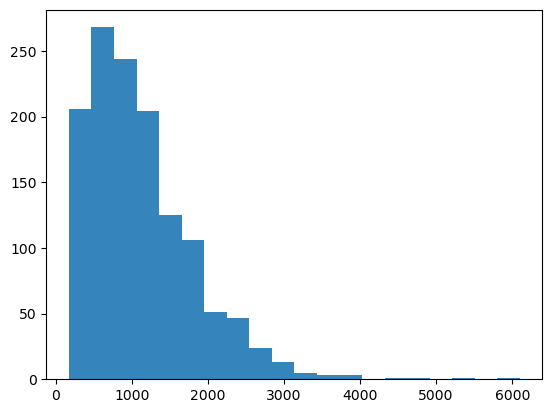

In [27]:
plt.hist(data["Price_euros"],bins=20,alpha=0.9)

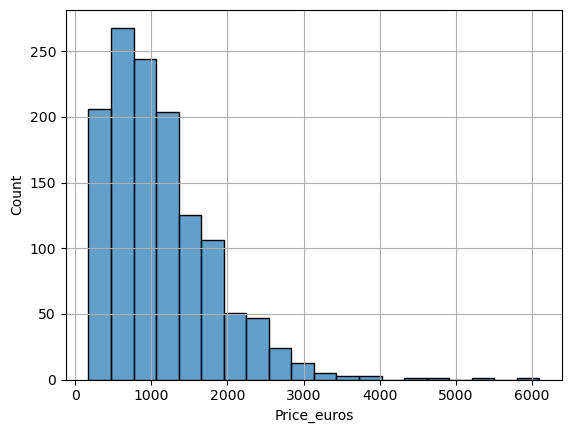

In [28]:
sns.histplot(data["Price_euros"],bins=20,alpha=0.7)
plt.grid()

{'whiskers': [<matplotlib.lines.Line2D at 0x236823ad130>,
 'caps': [<matplotlib.lines.Line2D at 0x236823e0980>,
 'boxes': [<matplotlib.lines.Line2D at 0x236819dd340>],
 'medians': [<matplotlib.lines.Line2D at 0x236823e0e00>],
 'fliers': [<matplotlib.lines.Line2D at 0x236823e10a0>],
 'means': []}

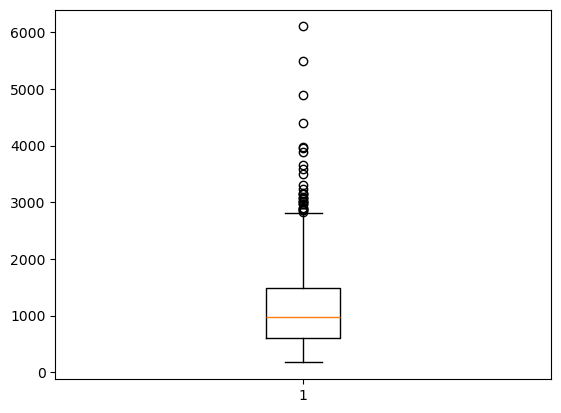

In [29]:
plt.boxplot(data[["Price_euros"]])

<Axes: ylabel='Price_euros'>

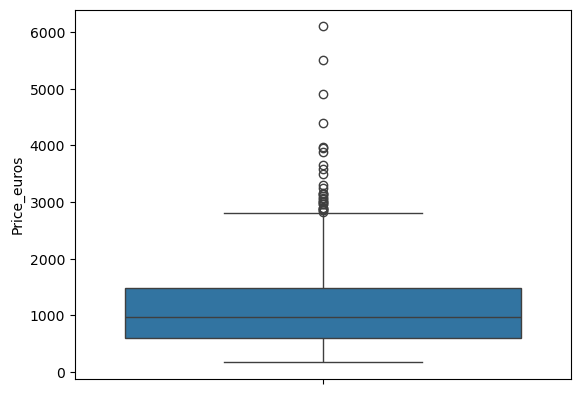

In [30]:
sns.boxplot(y="Price_euros",data=data)

In [31]:
Q1=data["Price_euros"].quantile(0.25)
Q1

599.0

In [32]:
Q3=data["Price_euros"].quantile(0.75)
Q3

1487.88

In [33]:
upper_bound=Q3+1.5*(Q3-Q1)
upper_bound

2821.2000000000003

In [34]:
data["Price_euros"].max()

6099.0

In [35]:
lower_bound=Q1-1.5*(Q3-Q1)
lower_bound

-734.3200000000002

In [36]:
data_clean=data.loc[(data["Price_euros"]<=upper_bound) & (data["Price_euros"]>=lower_bound)]
data_clean

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


<Axes: ylabel='Price_euros'>

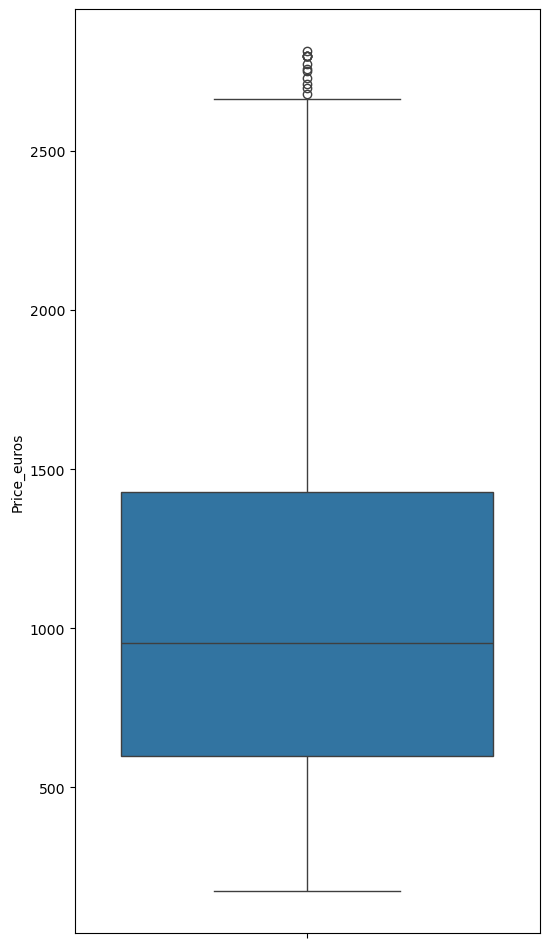

In [37]:
plt.figure(figsize=(6,12))
sns.boxplot(y="Price_euros",data=data_clean)

### How does the price vary with different brands? Create a bar plot to show the average price of laptops for each brand.

In [38]:
data

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [39]:
data_avg=data.groupby(['Company'])['Price_euros'].mean().reset_index()
data_avg

,Company,Price_euros
0,Acer,626.775825
1,Apple,1564.198571
2,Asus,1104.169367
3,Chuwi,314.296667
4,Dell,1186.068990
5,Fujitsu,729.000000
6,Google,1677.666667
7,HP,1067.774854
8,Huawei,1424.000000
9,LG,2099.000000


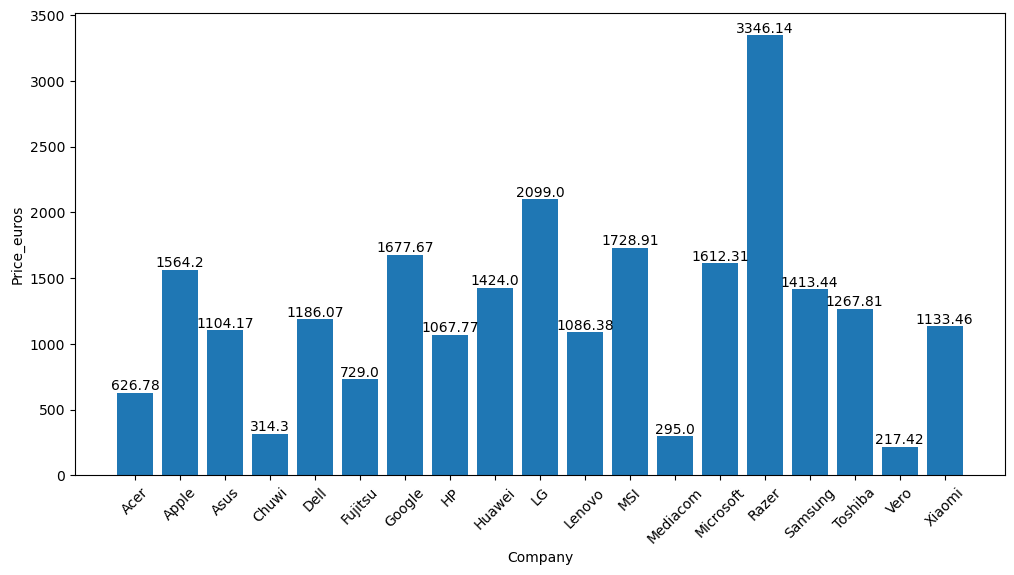

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(data_avg["Company"], data_avg["Price_euros"])
plt.xticks(rotation=45)
plt.xlabel("Company")
plt.ylabel("Price_euros")

ax = plt.gca()
for p in ax.patches:
    height_rounded = round(p.get_height(), 2)  # Round to 2 decimal places
    ax.annotate(f"{height_rounded}", (p.get_x() + p.get_width() / 2., height_rounded), ha="center", va="bottom")

plt.show()


### Is there a relationship between the RAM size and the price of the laptops? Create a scatter plot to show this relationship.

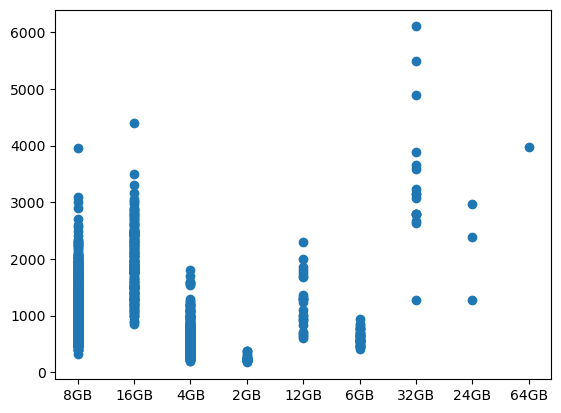

In [41]:
plt.scatter(data['Ram'],data['Price_euros'])

### How does the price of laptops vary with screen size? Visualize this relationship.

In [42]:
data_display=data.groupby(['Inches'])['Price_euros'].mean().reset_index()
data_display

,Inches,Price_euros
0,10.1,498.317500
1,11.3,1299.000000
2,11.6,393.613636
3,12.0,1279.900000
4,12.3,1228.200000
5,12.5,1583.493077
6,13.0,1424.000000
7,13.3,1332.318354
8,13.5,1612.308333
9,13.9,1637.333333


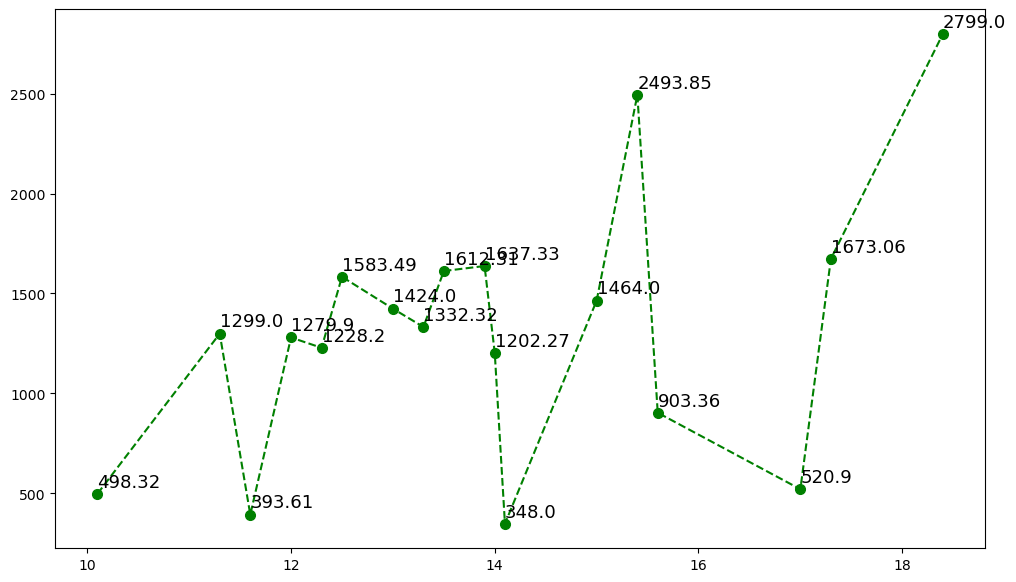

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
plt.plot(data_display['Inches'], data_display["Price_euros"], linestyle='--', marker="o", markersize=7,c='g')
ax = plt.gca()

for x, y in zip(data_display['Inches'], data_display["Price_euros"]):
    rounded_y = round(y, 2)  # Round to 2 decimal places
    plt.annotate(f'{rounded_y}', (x, y), textcoords="offset points", xytext=(0, 5), fontsize=13)

plt.show()


### What are the most common laptop screen resolutions and how do they affect the price? Create a bar plot or box plot to visualize this.

In [44]:
data["ScreenResolution"].nunique()

40

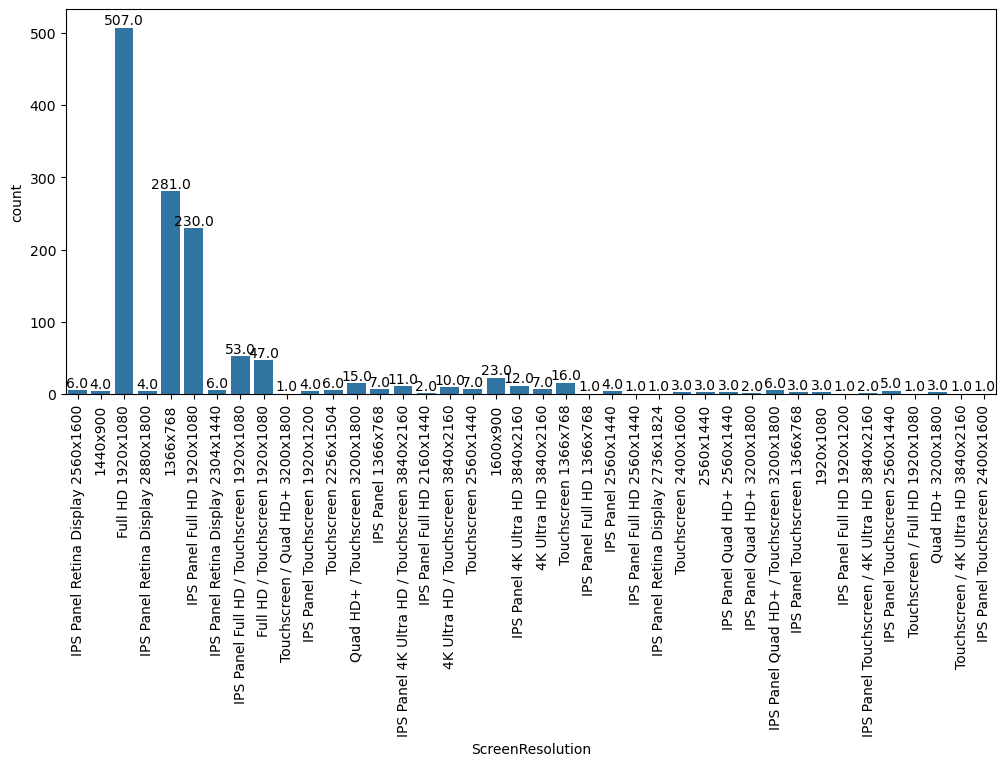

In [45]:
plt.figure(figsize=(12,5))
sns.countplot(x="ScreenResolution",data=data)

ax=plt.gca()
for p in ax.patches:
    round_height=round(p.get_height(),2)
    ax.annotate(f'{round_height}',(p.get_x() + p.get_width()/2.,p.get_height()),ha="center",va='bottom')


plt.xticks(rotation=90)
plt.show()

In [46]:
data["ScreenResolution"].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [47]:
X=data.loc[data["ScreenResolution"]=="Full HD 1920x1080"]
X

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00
11,12,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,No OS,1.86kg,344.99
13,14,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,256GB SSD,AMD Radeon R5 M430,Windows 10,2.2kg,498.90
16,17,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,AMD Radeon R5 M430,Windows 10,2.2kg,745.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1258,1276,Lenovo,B51-80 (i7-6500U/8GB/1008GB/Radeon,Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8GB,1.0TB Hybrid,AMD Radeon R5 M330,Windows 7,2.32kg,895.00
1259,1277,MSI,GE62 Apache,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.4kg,1229.00
1266,1284,HP,Pavilion 15-AW003nv,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,549.99
1280,1298,HP,Pavilion 15-AW003nv,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,549.99


In [48]:
Y=data.loc[~(data["ScreenResolution"]=="Full HD 1920x1080")]
Y

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [49]:
Y1=Y.groupby(Y["Company"])["Price_euros"].mean().reset_index()
Y1

,Company,Price_euros
0,Acer,601.328171
1,Apple,1564.198571
2,Asus,923.999398
3,Chuwi,449.000000
4,Dell,1237.262395
5,Fujitsu,729.000000
6,Google,1677.666667
7,HP,1027.357905
8,Huawei,1424.000000
9,LG,2099.000000


In [50]:
X1=X.groupby(X["Company"])["Price_euros"].mean().reset_index()
X1

,Company,Price_euros
0,Acer,726.142857
1,Asus,1303.557467
2,Chuwi,246.945000
3,Dell,1120.305154
4,HP,1115.248730
5,Lenovo,867.377619
6,MSI,1701.965435
7,Mediacom,244.000000
8,Razer,2999.000000
9,Samsung,1679.000000


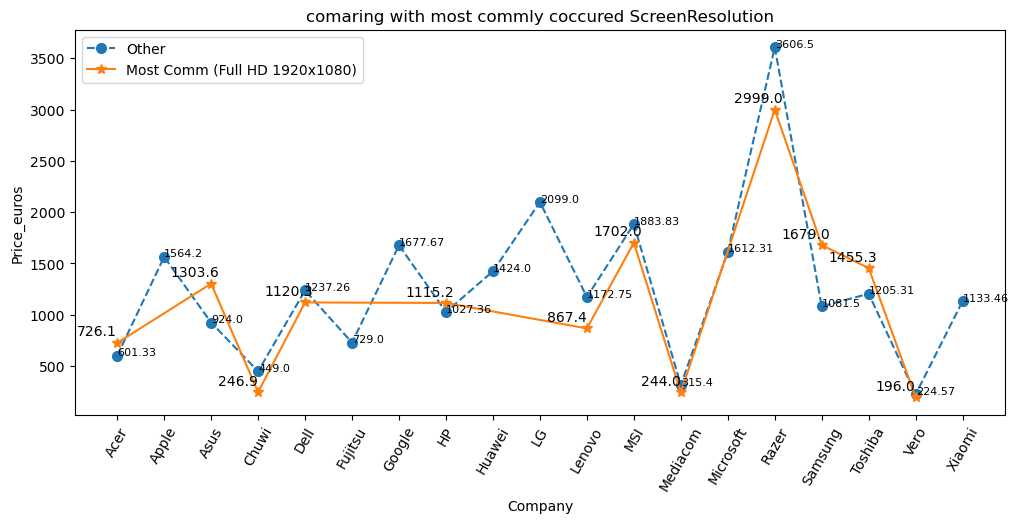

In [51]:
plt.figure(figsize=(12,5))
plt.plot(Y1["Company"],Y1["Price_euros"],marker='o',markersize=7,linestyle='--',label="Other")
plt.plot(X1["Company"],X1["Price_euros"],marker='*',markersize=7,linestyle='-',label="Most Comm (Full HD 1920x1080)")
    
for x, y in zip(Y1["Company"],Y1["Price_euros"]):
    rounded_y = round(y, 2)  # Round to 2 decimal places
    plt.annotate(f'{rounded_y}', (x, y), textcoords="offset points", xytext=(0, 0), fontsize=8)

for x, y in zip(X1["Company"], X1["Price_euros"]):
    rounded_y = round(y, 1)  # Round to 2 decimal places
    plt.annotate(f'{rounded_y}', (x, y), textcoords="offset points", xytext=(-29, 5), fontsize=10)

    
plt.legend()
plt.xlabel("Company")
plt.ylabel("Price_euros")
plt.title("comaring with most commly coccured ScreenResolution")
plt.xticks(rotation=60)
plt.show()


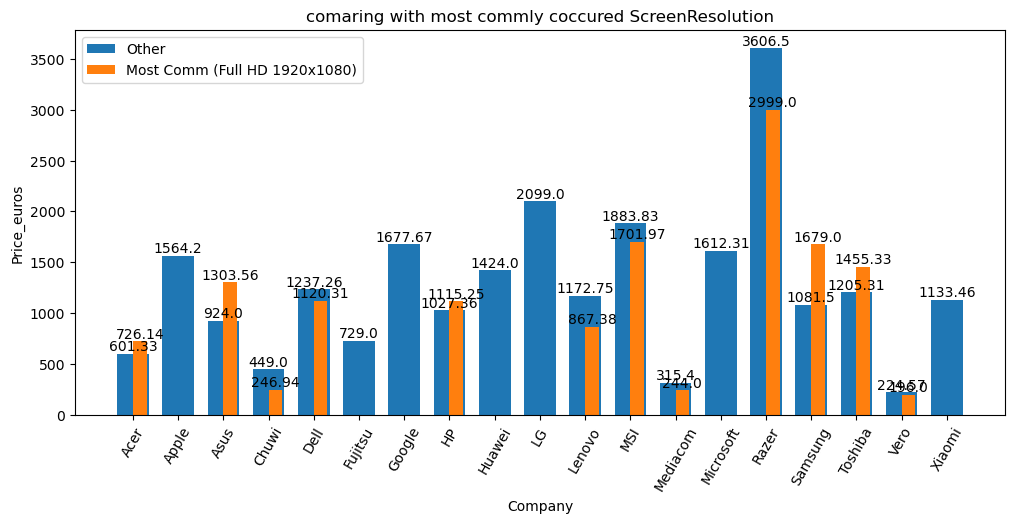

In [52]:
plt.figure(figsize=(12,5))
plt.bar(Y1["Company"],Y1["Price_euros"],align='center',label="Other",width=0.7)
plt.bar(X1["Company"],X1["Price_euros"],align='edge',label="Most Comm (Full HD 1920x1080)",width=0.3)

ax=plt.gca()

#for annotation
for p in ax.patches:
    round_height=round(p.get_height(),2)
    ax.annotate(f'{round_height}',(p.get_x() + p.get_width()/2.,p.get_height()),ha="center",va='bottom')

plt.legend()
plt.xlabel("Company")
plt.ylabel("Price_euros")
plt.title("comaring with most commly coccured ScreenResolution")
plt.xticks(rotation=60)
plt.show()
